In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

plt.style.use('default')
sns.set_palette("viridis")

In [40]:
X = pd.read_csv('Леденцы.dat', sep=';', encoding='utf-8')

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

АНАЛИЗ ДЛЯ K-MEANS


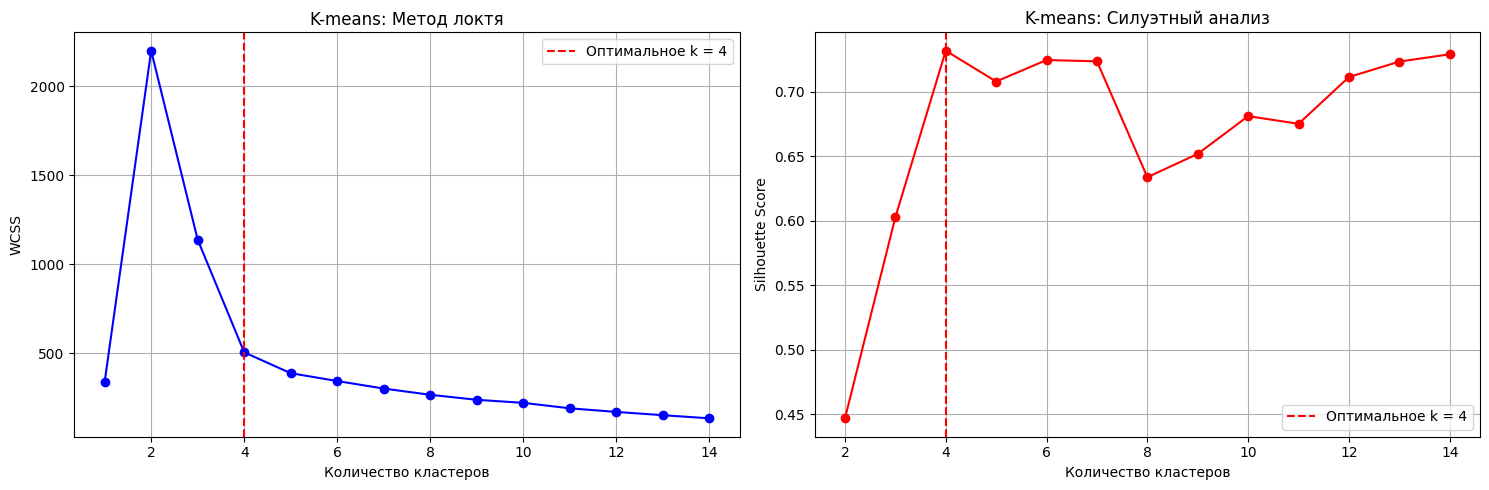

Оптимальное k (метод локтя): 4
Оптимальное k (силуэт): 4
Лучший силуэтный score: 0.732


In [42]:
def analyze_kmeans(X, max_k=14):
    print("=" * 50)
    print("АНАЛИЗ ДЛЯ K-MEANS")
    print("=" * 50)

    wcss = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        # K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        # WCSS
        wcss.append(kmeans.inertia_)

        # Silhouette Score
        silhouette_scores.append(silhouette_score(X, labels))

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Метод локтя
    ax1.plot(range(1, max_k + 1), [X.shape[0] * X.var()] + wcss, 'bo-')
    ax1.set_xlabel('Количество кластеров')
    ax1.set_ylabel('WCSS')
    ax1.set_title('K-means: Метод локтя')
    ax1.grid(True)

    # Автоматическое определение локтя
    differences = np.diff(wcss)
    second_diff = np.diff(differences)
    if len(second_diff) > 0:
        elbow_k = np.argmax(second_diff) + 3
        ax1.axvline(x=elbow_k, color='red', linestyle='--', label=f'Оптимальное k = {elbow_k}')
        ax1.legend()

    # Силуэтный анализ
    ax2.plot(k_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('Количество кластеров')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('K-means: Силуэтный анализ')
    ax2.grid(True)

    # Оптимальное k по силуэту
    optimal_silhouette_k = k_range[np.argmax(silhouette_scores)]
    ax2.axvline(x=optimal_silhouette_k, color='red', linestyle='--',
                label=f'Оптимальное k = {optimal_silhouette_k}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    print(f"Оптимальное k (метод локтя): {elbow_k}")
    print(f"Оптимальное k (силуэт): {optimal_silhouette_k}")
    print(f"Лучший силуэтный score: {max(silhouette_scores):.3f}")

    return elbow_k, optimal_silhouette_k


kmeans_elbow, kmeans_silhouette = analyze_kmeans(X_scaled)

Вывод: оптимальное K = 4

АНАЛИЗ ДЛЯ HCA


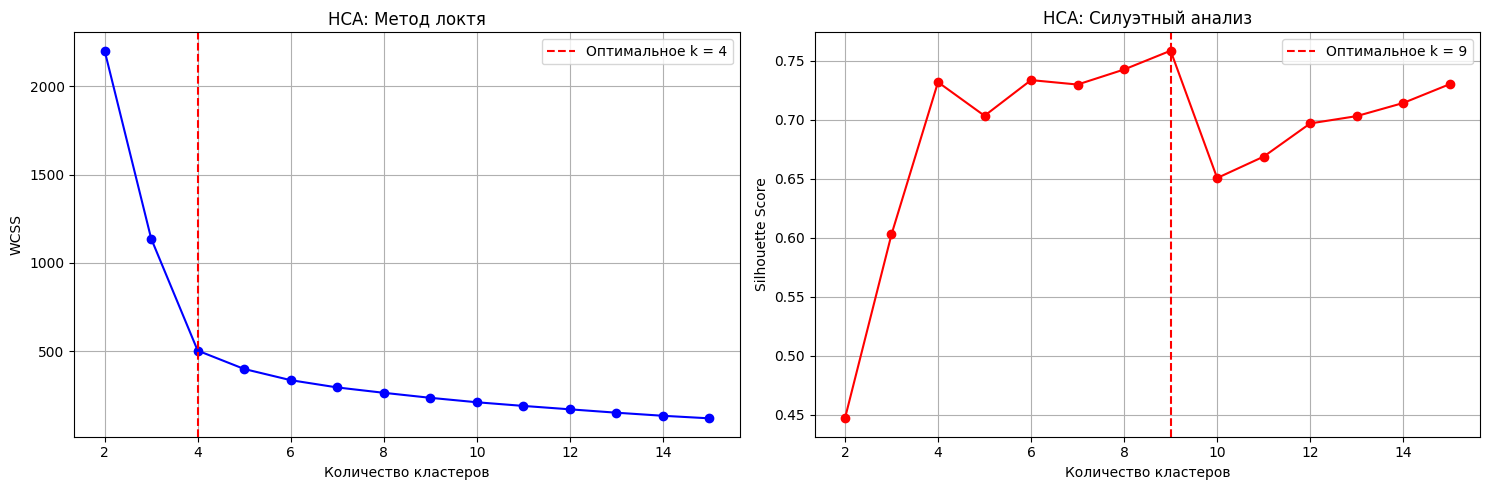

Оптимальное k (метод локтя): 4
Оптимальное k (силуэт): 9
Лучший силуэтный score: 0.758


In [43]:
def analyze_hca(X, max_k=15):
    """Анализ для Hierarchical Clustering"""
    print("=" * 50)
    print("АНАЛИЗ ДЛЯ HCA")
    print("=" * 50)

    wcss = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        hca = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels = hca.fit_predict(X)

        # Вычисляем WCSS вручную для HCA
        if hasattr(hca, 'labels_'):
            wcss_k = 0
            for i in range(k):
                cluster_points = X[labels == i]
                if len(cluster_points) > 0:
                    centroid = cluster_points.mean(axis=0)
                    wcss_k += np.sum((cluster_points - centroid) ** 2)
            wcss.append(wcss_k)
        else:
            wcss.append(np.nan)

        # Silhouette Score
        silhouette_scores.append(silhouette_score(X, labels))

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Метод локтя
    ax1.plot(k_range, wcss, 'bo-')
    ax1.set_xlabel('Количество кластеров')
    ax1.set_ylabel('WCSS')
    ax1.set_title('HCA: Метод локтя')
    ax1.grid(True)

    # Автоматическое определение локтя
    if len(wcss) > 2:
        differences = np.diff(wcss)
        second_diff = np.diff(differences)
        if len(second_diff) > 0:
            elbow_k = np.argmax(second_diff) + 3
            ax1.axvline(x=elbow_k, color='red', linestyle='--', label=f'Оптимальное k = {elbow_k}')
            ax1.legend()

    # Силуэтный анализ
    ax2.plot(k_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('Количество кластеров')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('HCA: Силуэтный анализ')
    ax2.grid(True)

    # Оптимальное k по силуэту
    optimal_silhouette_k = k_range[np.argmax(silhouette_scores)]
    ax2.axvline(x=optimal_silhouette_k, color='red', linestyle='--',
                label=f'Оптимальное k = {optimal_silhouette_k}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    print(f"Оптимальное k (метод локтя): {elbow_k}")
    print(f"Оптимальное k (силуэт): {optimal_silhouette_k}")
    print(f"Лучший силуэтный score: {max(silhouette_scores):.3f}")

    return elbow_k, optimal_silhouette_k


hca_elbow, hca_silhouette = analyze_hca(X_scaled)

Вывод: наибольший silhouette score достигается при K = 9, однако и при K = 4 он тоже высок, так что можно считать, что K = 4 оптимально

График колена для подбора eps:


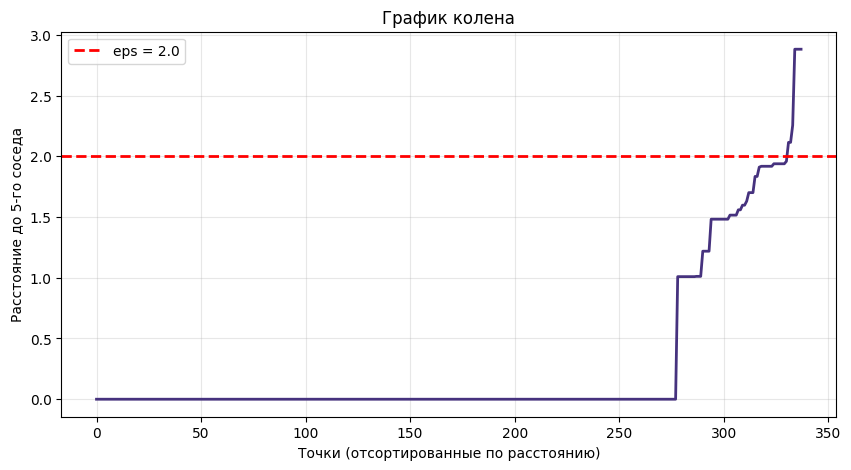


Подбор min_samples методом локтя:


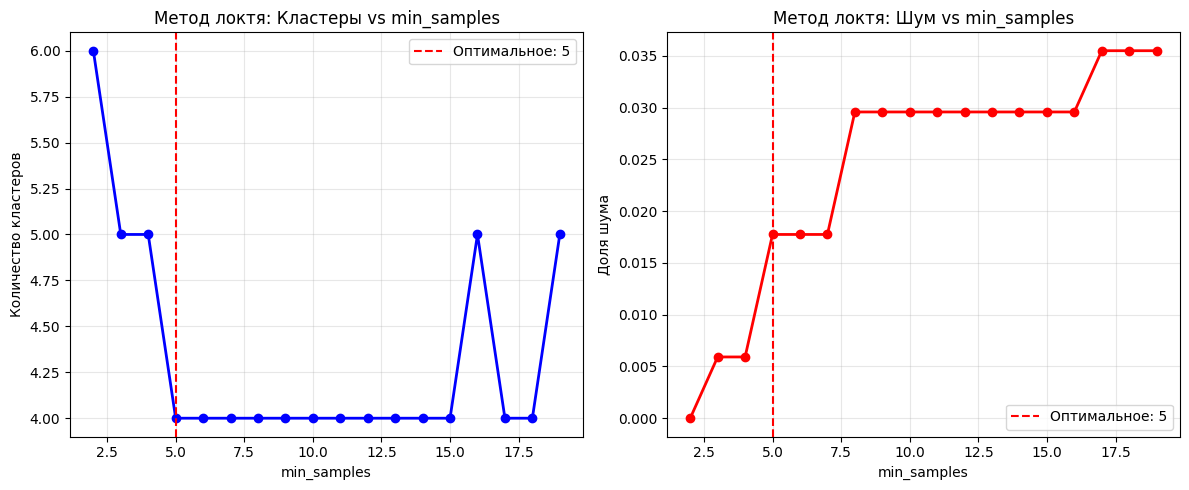

Оптимальный min_samples: 5
Результаты с eps=2, min_samples=5:
Кластеров: 4
Точек шума: 6 (1.8%)


In [44]:
def find_optimal_min_samples_simple(X_scaled, eps=2.0):
    print("График колена для подбора eps:")
    plot_knee_method(X_scaled)

    print("\nПодбор min_samples методом локтя:")
    optimal_min_samples = plot_elbow_method(X_scaled, eps=eps)

    return optimal_min_samples

def plot_knee_method(X_scaled, k=5):

    # Вычисляем расстояния до k-го соседа
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_scaled)
    distances, indices = neighbors_fit.kneighbors(X_scaled)
    k_distances = np.sort(distances[:, k-1])

    plt.figure(figsize=(10, 5))
    plt.plot(k_distances, linewidth=2)
    plt.axhline(y=2.0, color='red', linestyle='--', linewidth=2, label='eps = 2.0')
    plt.xlabel('Точки (отсортированные по расстоянию)')
    plt.ylabel(f'Расстояние до {k}-го соседа')
    plt.title('График колена')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


def plot_elbow_method(X_scaled, eps=2.0):

    min_samples_range = range(2, 20)
    n_clusters_list = []
    noise_ratio_list = []

    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.sum(labels == -1) / len(labels)

        n_clusters_list.append(n_clusters)
        noise_ratio_list.append(noise_ratio)

    # Находим оптимальный min_samples
    # Визуально видно, что это 5
    optimal_min_samples = 5

    # График количества кластеров
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(min_samples_range, n_clusters_list, 'bo-', linewidth=2, markersize=6)
    plt.axvline(x=optimal_min_samples, color='red', linestyle='--',
                label=f'Оптимальное: {optimal_min_samples}')
    plt.xlabel('min_samples')
    plt.ylabel('Количество кластеров')
    plt.title('Метод локтя: Кластеры vs min_samples')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # График доли шума
    plt.subplot(1, 2, 2)
    plt.plot(min_samples_range, noise_ratio_list, 'ro-', linewidth=2, markersize=6)
    plt.axvline(x=optimal_min_samples, color='red', linestyle='--',
                label=f'Оптимальное: {optimal_min_samples}')
    plt.xlabel('min_samples')
    plt.ylabel('Доля шума')
    plt.title('Метод локтя: Шум vs min_samples')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Выводим результаты
    dbscan_optimal = DBSCAN(eps=eps, min_samples=optimal_min_samples)
    labels_optimal = dbscan_optimal.fit_predict(X_scaled)
    n_clusters_optimal = len(set(labels_optimal)) - (1 if -1 in labels_optimal else 0)
    n_noise_optimal = np.sum(labels_optimal == -1)

    print(f"Оптимальный min_samples: {optimal_min_samples}")
    print(f"Результаты с eps=2, min_samples={optimal_min_samples}:")
    print(f"Кластеров: {n_clusters_optimal}")
    print(f"Точек шума: {n_noise_optimal} ({n_noise_optimal/len(X_scaled):.1%})")

    return optimal_min_samples


optimal_min_samples = find_optimal_min_samples_simple(X_scaled, eps=2.0)

Вывод: количество кластеров выходит 4, если eps взять за 2. Однако у первого графика несколько коленей. Если взять eps меньше, то кластеров будет больше. Но, кажется, остальные колени возникают из-за дискретности признаков, а истинное колено соотвествует eps = 2

Анализ данных: 338 строк, 11 признаков
Признаки: V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11
АНАЛИЗ КЛАСТЕРИЗАЦИИ: 2D ВИЗУАЛИЗАЦИЯ И СТАТИСТИКА

1. 2D ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ (PCA)


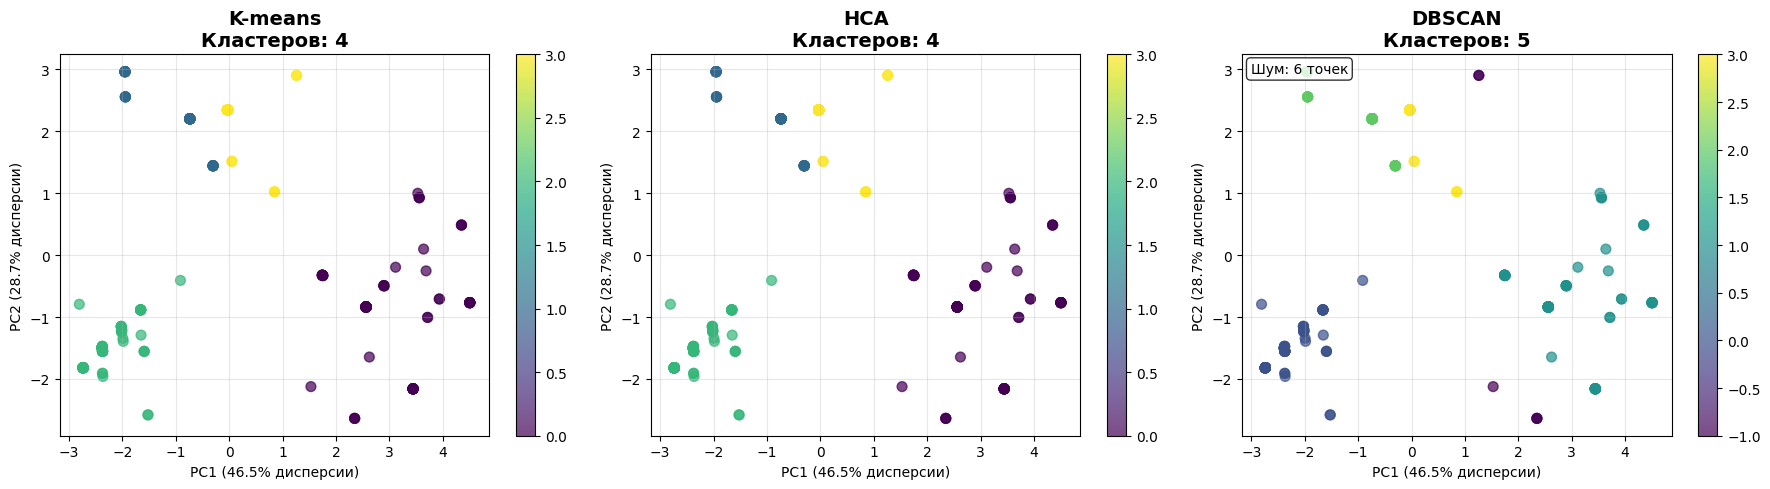


2. ДЕНДРОГРАММА ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ


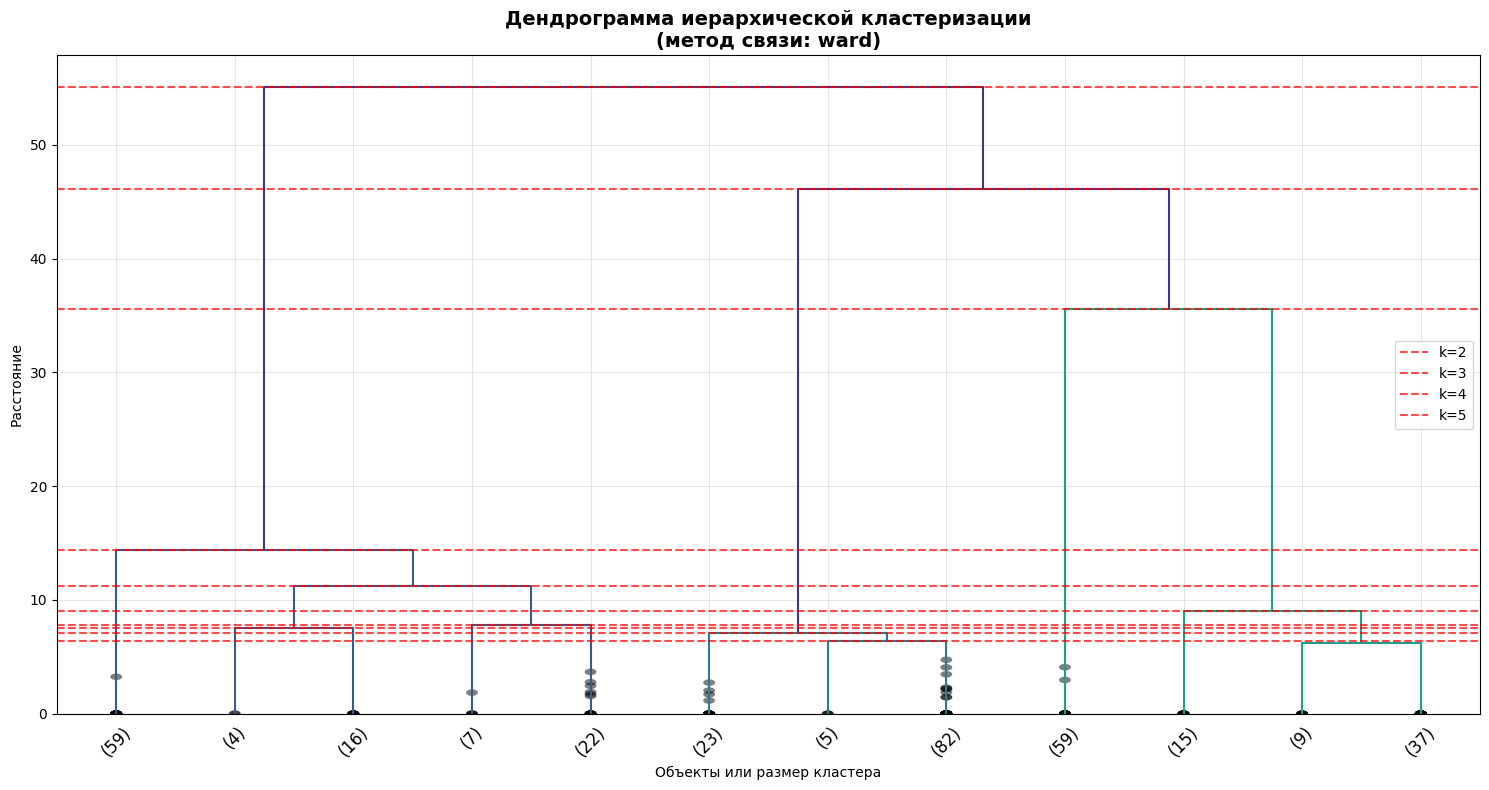


СРЕДНИЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ

МЕТОД: K-means

КЛАСТЕР 0 (точек: 108):
  V1: -0.755 ± 0.399
  V2: -0.726 ± 0.483
  V3: -0.758 ± 0.508
  V4: -0.798 ± 0.562
  V5: -0.688 ± 0.563
  V6: -0.715 ± 0.568
  V7: -0.598 ± 0.668
  V8: -0.455 ± 0.553
  V9: 1.394 ± 0.217
  V10: 1.366 ± 0.420
  V11: 1.378 ± 0.368

КЛАСТЕР 1 (точек: 61):
  V1: -0.570 ± 0.000
  V2: -0.551 ± 0.000
  V3: -0.524 ± 0.000
  V4: -0.415 ± 0.000
  V5: 1.900 ± 0.410
  V6: 1.898 ± 0.408
  V7: -0.302 ± 0.000
  V8: -0.453 ± 0.334
  V9: -0.877 ± 0.445
  V10: -0.860 ± 0.465
  V11: -0.862 ± 0.458

КЛАСТЕР 2 (точек: 110):
  V1: 1.363 ± 0.379
  V2: 1.333 ± 0.419
  V3: 1.334 ± 0.374
  V4: 1.282 ± 0.470
  V5: -0.197 ± 0.216
  V6: -0.193 ± 0.216
  V7: -0.302 ± 0.000
  V8: -0.364 ± 0.307
  V9: -0.548 ± 0.268
  V10: -0.545 ± 0.225
  V11: -0.552 ± 0.221

КЛАСТЕР 3 (точек: 59):
  V1: -0.570 ± 0.000
  V2: -0.587 ± 0.189
  V3: -0.558 ± 0.183
  V4: -0.501 ± 0.281
  V5: -0.337 ± 0.322
  V6: -0.294 ± 0.253
  V7: 1.970 ± 0.330
  V8: 1.9

In [45]:
def apply_clustering_methods(X, k_optimal=3, dbscan_params=None):
    """Применяем все три метода кластеризации"""

    # K-means
    kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)

    # HCA (Agglomerative Clustering)
    hca = AgglomerativeClustering(n_clusters=k_optimal, linkage='ward')
    hca_labels = hca.fit_predict(X)

    # DBSCAN
    dbscan = DBSCAN(eps=dbscan_params['eps'], min_samples=dbscan_params['min_samples'])
    dbscan_labels = dbscan.fit_predict(X)

    return {
        'K-means': kmeans_labels,
        'HCA': hca_labels,
        'DBSCAN': dbscan_labels
    }, kmeans

def plot_2d_clusters(X, labels_dict, feature_names=None):
    """Визуализация кластеров в 2D с помощью PCA"""

    # Применяем PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for idx, (method, labels) in enumerate(labels_dict.items()):
        ax = axes[idx]

        # Основной scatter plot
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                           c=labels, cmap='viridis', alpha=0.7, s=50)

        # Настройки графика
        ax.set_title(f'{method}\nКластеров: {len(np.unique(labels))}',
                    fontsize=14, fontweight='bold')
        ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
        ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
        ax.grid(True, alpha=0.3)

        # Цветовая шкала
        plt.colorbar(scatter, ax=ax)

        # Добавляем информацию о шуме для DBSCAN
        if method == 'DBSCAN' and -1 in labels:
            noise_points = np.sum(labels == -1)
            ax.text(0.02, 0.98, f'Шум: {noise_points} точек',
                   transform=ax.transAxes, bbox=dict(boxstyle="round,pad=0.3",
                   facecolor="white", alpha=0.8), verticalalignment='top')

    plt.tight_layout()
    plt.show()


def plot_dendrogram(X, method='ward'):
    """Построение дендрограммы для иерархической кластеризации"""

    plt.figure(figsize=(15, 8))

    # Вычисляем linkage matrix
    Z = linkage(X, method=method, metric='euclidean')

    # Строим дендрограмму
    dendrogram(Z,
               truncate_mode='lastp',  # показываем только последние p объединений
               p=12,                   # количество последних объединений для показа
               show_leaf_counts=True,
               leaf_rotation=45.,
               leaf_font_size=12.,
               show_contracted=True)

    plt.title(f'Дендрограмма иерархической кластеризации\n(метод связи: {method})',
             fontsize=14, fontweight='bold')
    plt.xlabel('Объекты или размер кластера')
    plt.ylabel('Расстояние')
    plt.grid(True, alpha=0.3)

    # Добавляем линии для возможных количеств кластеров
    distances = Z[-10:, 2]  # расстояния последних 10 объединений
    for i, dist in enumerate(distances[::-1]):
        k = i + 2
        plt.axhline(y=dist, color='red', linestyle='--', alpha=0.7,
                   label=f'k={k}' if k in [2, 3, 4, 5] else "")

    plt.legend()
    plt.tight_layout()
    plt.show()

def print_cluster_statistics(X, labels_dict, feature_names=None, original_data=None):
    """Вывод средних значений по фичам в каждом кластере"""

    if feature_names is None:
        feature_names = [f'Признак {i+1}' for i in range(X.shape[1])]

    print("\n" + "=" * 80)
    print("СРЕДНИЕ ЗНАЧЕНИЯ ПРИЗНАКОВ ПО КЛАСТЕРАМ")
    print("=" * 80)

    for method, labels in labels_dict.items():
        print(f"\n{'='*50}")
        print(f"МЕТОД: {method}")
        print(f"{'='*50}")

        unique_labels = np.unique(labels)

        # Для каждого кластера выводим статистику
        for label in unique_labels:
            if label == -1:
                cluster_name = "ШУМ"
                cluster_mask = labels == -1
            else:
                cluster_name = f"КЛАСТЕР {label}"
                cluster_mask = labels == label

            cluster_data = X[cluster_mask]
            cluster_size = np.sum(cluster_mask)

            print(f"\n{cluster_name} (точек: {cluster_size}):")

            # Средние значения для каждого признака
            means = np.mean(cluster_data, axis=0)
            stds = np.std(cluster_data, axis=0)

            for i, (mean, std) in enumerate(zip(means, stds)):
                print(f"  {feature_names[i]}: {mean:.3f} ± {std:.3f}")

        # Сводная таблица по всем кластерам
        print(f"\nСВОДНАЯ ТАБЛИЦА ДЛЯ {method}:")
        print("-" * 60)

        # Создаем DataFrame для красивого вывода
        stats_data = []
        for label in unique_labels:
            if label == -1:
                continue

            cluster_mask = labels == label
            cluster_data = X[cluster_mask]
            cluster_size = np.sum(cluster_mask)

            if cluster_size > 0:
                means = np.mean(cluster_data, axis=0)
                stats_data.append([f'Cluster {label}', cluster_size] + list(means))

        # Создаем DataFrame
        if stats_data:
            columns = ['Кластер', 'Размер'] + feature_names
            stats_df = pd.DataFrame(stats_data, columns=columns)
            print(stats_df.to_string(index=False, float_format='%.3f'))

        print(f"\nВсего кластеров: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
        if -1 in unique_labels:
            noise_points = np.sum(labels == -1)
            print(f"Точек шума: {noise_points}")

def comprehensive_cluster_analysis(X, k_optimal=3, dbscan_params=None, feature_names=None):
    """Комплексный анализ кластеризации с визуализацией и статистикой"""

    print("=" * 60)
    print("АНАЛИЗ КЛАСТЕРИЗАЦИИ: 2D ВИЗУАЛИЗАЦИЯ И СТАТИСТИКА")
    print("=" * 60)

    # Применяем методы кластеризации
    labels_dict, kmeans_model = apply_clustering_methods(X, k_optimal, dbscan_params)

    # 1. Визуализация в 2D пространстве (PCA)
    print("\n1. 2D ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ (PCA)")
    X_pca = plot_2d_clusters(X, labels_dict, feature_names)

    # 2. Дендрограмма для HCA
    print("\n2. ДЕНДРОГРАММА ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ")
    plot_dendrogram(X)

    # 3. Статистика по кластерам
    print_cluster_statistics(X, labels_dict, feature_names)

    return labels_dict, kmeans_model


k_optimal = 4
dbscan_params = {'eps': 2, 'min_samples': 5}

print(f"Анализ данных: {X_scaled.shape[0]} строк, {X_scaled.shape[1]} признаков")
print(f"Признаки: {', '.join(list(X.columns))}")

# Запуск анализа
labels_dict, kmeans_model = comprehensive_cluster_analysis(
    X_scaled,
    k_optimal=k_optimal,
    dbscan_params=dbscan_params,
    feature_names=list(X.columns)
)

Вывод: во всех методах выделяются 4 кластера, соответствующие высоким значениям по группам признаков: (V1, V2, V3, V4), (V5, V6), (V7, V8), (V9, V10, V11)

Людей принадлежащих этим кластерам можно охарактеризовать как: Практичные, Сладкоежки, Концентрирующиеся, Лечащиеся